In [61]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [19]:
sys.path.append('./../Scripts/')
import inv_flux as invf

In [27]:
fRayner = "./../Output/output_raw/output_all/Rayner_all/year.pik"
Rayner = pickle.load(open(fRayner, "rb"))
Rayner = invf.Analysis(Rayner).cftime_to_datetime()
Rayner

<xarray.Dataset>
Dimensions:         (time: 21)
Coordinates:
  * time            (time) datetime64[ns] 1992-12-01 1993-12-01 ... 2012-12-01
Data variables:
    Earth_Land      (time) float64 -2.447 -3.349 -0.7345 ... -4.192 -2.768
    South_Land      (time) float64 0.224 -0.3685 0.2921 ... -0.7236 -0.12
    Tropical_Land   (time) float64 -0.8121 -0.3696 0.5733 ... -0.5483 0.6304
    North_Land      (time) float64 -1.859 -2.611 -1.6 ... -2.7 -2.92 -3.279
    Earth_Ocean     (time) float64 -0.2522 1.241 0.113 ... 0.1794 -0.1197
    South_Ocean     (time) float64 0.5105 1.078 0.5778 ... 0.4099 0.6217 0.3392
    Tropical_Ocean  (time) float64 -0.4834 -0.01013 -0.4716 ... -0.3309 -0.3562
    North_Ocean     (time) float64 -0.2793 0.1733 0.006788 ... -0.1114 -0.1026

In [28]:
def open_data(fdata):
    data = pickle.load(open(fdata, "rb"))
    data = invf.Analysis(data).cftime_to_datetime()
    return data

In [30]:
Rayner=open_data("./../Output/output_raw/output_all/Rayner_all/year.pik")
CAMS=open_data("./../Output/output_raw/output_all/CAMS_all/year.pik")
CTRACKER=open_data("./../Output/output_raw/output_all/CTRACKER_all/year.pik")
JAMSTEC=open_data("./../Output/output_raw/output_all/JAMSTEC_all/year.pik")
JENA_s76=open_data("./../Output/output_raw/output_all/JENA_s76_all/year.pik")
JENA_s85=open_data("./../Output/output_raw/output_all/JENA_s85_all/year.pik")

In [74]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
df = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5])
df.head()

,ocean sink,land sink
Year,,
1959,0.852376,0.516073
1960,0.819017,1.394030
1961,0.714842,0.605098
1962,0.756709,1.348349
1963,0.904997,0.877794


In [75]:
ocean = -df["ocean sink"]
land = -df["land sink"]

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

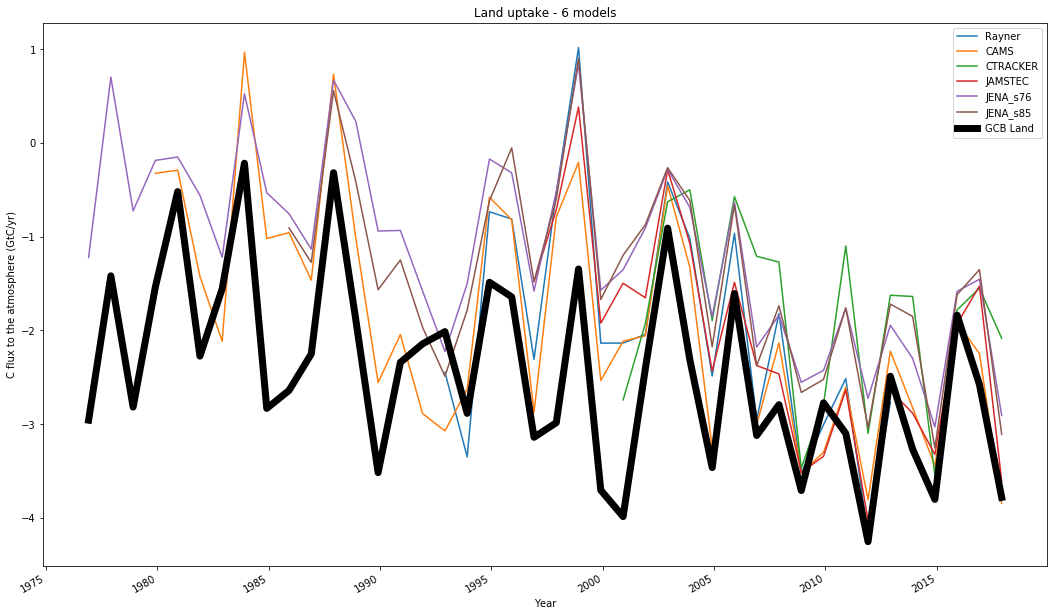

In [82]:
plt.figure(figsize=(18,10))

Rayner["Earth_Land"].plot()
CAMS["Earth_Land"].plot()
CTRACKER["Earth_Land"].plot()
JAMSTEC["Earth_Land"].plot()
JENA_s76["Earth_Land"].plot()
JENA_s85["Earth_Land"].plot()

plt.plot(JENA_s76.time.values, land[17:], linewidth=7.0 , color='k')

legend_land = ["Rayner", "CAMS", "CTRACKER", "JAMSTEC", "JENA_s76", "JENA_s85", "GCB Land"]
plt.legend(legend_land)

plt.title('Land uptake - 6 models')
plt.xlabel('Year')
plt.ylabel('C flux to the atmosphere (GtC/yr)')

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

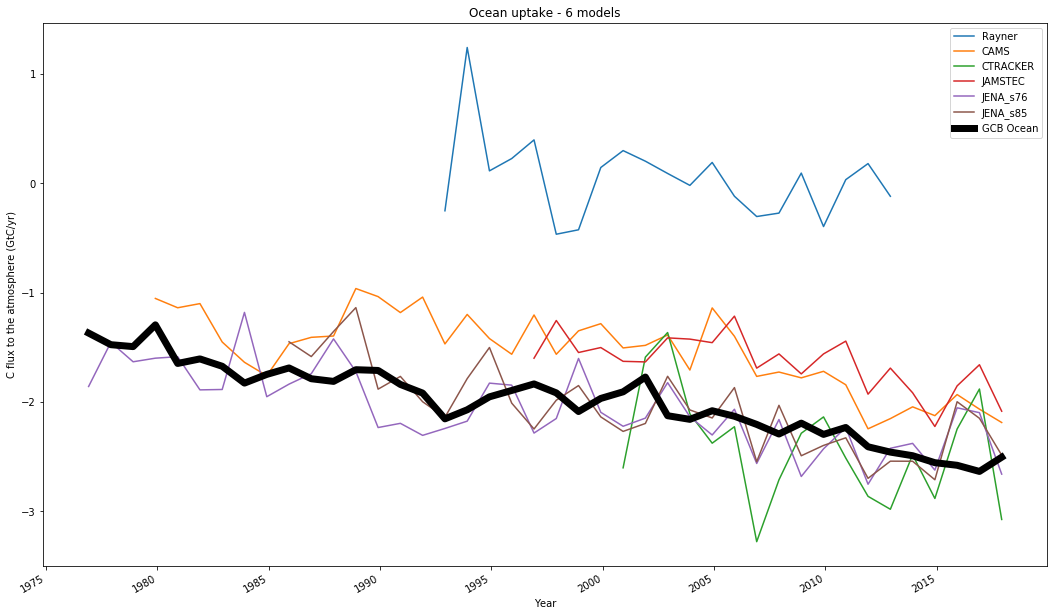

In [83]:
plt.figure(figsize=(18,10))

Rayner["Earth_Ocean"].plot()
CAMS["Earth_Ocean"].plot()
CTRACKER["Earth_Ocean"].plot()
JAMSTEC["Earth_Ocean"].plot()
JENA_s76["Earth_Ocean"].plot()
JENA_s85["Earth_Ocean"].plot()

plt.plot(JENA_s76.time.values, ocean[17:], linewidth=7.0 , color='k')

legend_ocean = ["Rayner", "CAMS", "CTRACKER", "JAMSTEC", "JENA_s76", "JENA_s85", "GCB Ocean"]
plt.legend(legend_ocean)

plt.title('Ocean uptake - 6 models')
plt.xlabel('Year')
plt.ylabel('C flux to the atmosphere (GtC/yr)')